In [19]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
import numpy as np
TRAIN_PATH = 'US_Accidents_Dec20.csv'
df_tmp = pd.read_csv(TRAIN_PATH, nrows=5)
print(df_tmp.head())
#df_tmp.info()
keys = df_tmp.columns
values = df_tmp.dtypes
dictionary = dict(zip(keys, values))
cols = list(dictionary.keys())
df = pd.read_csv(TRAIN_PATH, usecols=cols, dtype=dictionary)
df.head()

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset C

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [20]:
#helper function
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [21]:
models = ['xgboost','K-Neighbors','Random Forest','DecisionTree','Naive bayes']
Accuracies = []

In [22]:
print("-------- NAN in features")
print(df.isnull().sum(axis=0))


-------- NAN in features
ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)   

In [23]:
######data-preprocessing ####
#remove the columns missing too much data(NAN)
removed_list = ['TMC',
 'End_Lat',
 'End_Lng',
 'Number',
 'Wind_Chill(F)',
 'Wind_Speed(mph)',
 'Precipitation(in)']
df = df.drop(columns=removed_list)
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  Side                   object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Country                object 
 16  Timezone               object 
 17  Airport_Code           object 
 18  Weather_Timestamp      object 
 19  Temperature(F)         float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

In [24]:
#
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

neg_outliers=df[td]<=0
# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)
#drop the row with NAN
df = df.dropna()

In [29]:
column = df.columns

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df = ord_enc.fit_transform(df)

In [34]:
df =pd.DataFrame(df, columns = column)
df = df.drop(columns=['ID'])


In [35]:
df

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,1.0,2.0,1.0,22.0,922266.0,801690.0,11.0,1884419.0,118026.0,2.0,...,1.0,1.0,1.0,1.0,0.0,3.0,7.0,5.0,1.0,311.0
1,1.0,1.0,3.0,1.0,929051.0,841145.0,11.0,195068.0,74517.0,1.0,...,1.0,1.0,1.0,0.0,0.0,3.0,7.0,6.0,1.0,27.0
2,1.0,1.0,5.0,2.0,853758.0,802195.0,11.0,622033.0,182447.0,2.0,...,1.0,1.0,0.0,0.0,0.0,3.0,7.0,6.0,1.0,27.0
3,1.0,2.0,7.0,3.0,905762.0,795205.0,11.0,465656.0,118043.0,2.0,...,1.0,0.0,0.0,0.0,0.0,3.0,7.0,7.0,1.0,27.0
4,1.0,1.0,8.0,4.0,892260.0,796519.0,11.0,576116.0,134272.0,2.0,...,0.0,0.0,0.0,0.0,0.0,3.0,7.0,7.0,1.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088758,0.0,1.0,2328612.0,2323795.0,421617.0,300850.0,595.0,978537.0,157727.0,2.0,...,0.0,0.0,0.0,0.0,3.0,1.0,22.0,18.0,0.0,26.0
4088759,0.0,1.0,2328757.0,2324015.0,272765.0,320467.0,370.0,929212.0,118069.0,2.0,...,0.0,0.0,0.0,0.0,3.0,1.0,22.0,19.0,0.0,24.0
4088760,0.0,1.0,2328740.0,2323989.0,374231.0,273745.0,615.0,947629.0,106548.0,2.0,...,0.0,0.0,0.0,0.0,3.0,1.0,22.0,19.0,0.0,25.0
4088761,0.0,1.0,2328740.0,2323991.0,419319.0,218720.0,846.0,921819.0,175108.0,2.0,...,0.0,0.0,0.0,0.0,3.0,1.0,22.0,19.0,0.0,26.0


In [36]:
c = df.corr().abs()
correlation = c.loc['Severity',:]
correlation = correlation.sort_values(ascending=False)
first10 = correlation[0:11]
#print (df[first25.index])
print(first10)

Severity             1.000000
Description          0.172559
Traffic_Signal       0.170713
End_Time             0.164117
Side                 0.163632
Start_Time           0.162748
Weather_Timestamp    0.162016
Distance(mi)         0.152908
Year                 0.146452
Crossing             0.130918
Source               0.091639
Name: Severity, dtype: float64


In [37]:
df=df[first10.index]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088763 entries, 0 to 4088762
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           float64
 1   Description        float64
 2   Traffic_Signal     float64
 3   End_Time           float64
 4   Side               float64
 5   Start_Time         float64
 6   Weather_Timestamp  float64
 7   Distance(mi)       float64
 8   Year               float64
 9   Crossing           float64
 10  Source             float64
dtypes: float64(11)
memory usage: 343.1 MB
None


In [38]:

print(df.info())
#  target and features
y = df['Severity']
X = df.drop(columns='Severity')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088763 entries, 0 to 4088762
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           float64
 1   Description        float64
 2   Traffic_Signal     float64
 3   End_Time           float64
 4   Side               float64
 5   Start_Time         float64
 6   Weather_Timestamp  float64
 7   Distance(mi)       float64
 8   Year               float64
 9   Crossing           float64
 10  Source             float64
dtypes: float64(11)
memory usage: 343.1 MB
None


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
!pip install xgboost
import xgboost as xgb


data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) 
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.05,
                max_depth = 31, alpha = 1, n_estimators = 100, enable_categorical = True)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
y_pred = y_pred.round(0)
y_pred  = y_pred.astype(int)
Accuracy = accuracy(y_test, y_pred)
Accuracies.append(Accuracy)


[16:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [41]:
# K-Neighbors
from sklearn.neighbors import KNeighborsClassifier

kclf = KNeighborsClassifier(n_neighbors=10)

kclf = kclf.fit(X_train, y_train)
y_pred = kclf.predict(X_test)
y_pred = y_pred.round(0)
y_pred  = y_pred.astype(int)
print(y_pred)
Accuracy = accuracy(y_test, y_pred)
Accuracies.append(Accuracy)

[1 1 1 ... 2 1 2]


In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
Accuracy = accuracy(y_test, y_pred)
Accuracies.append(Accuracy)

In [43]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
rf1=DecisionTreeRegressor()
#rf2=RandomForestRegressor(n_estimators=1000)          
#rf3=ExtraTreesRegressor()
 
 
y_pred =rf1.fit(X_train,y_train).predict(X_test)
Accuracy = accuracy(y_test, y_pred)
Accuracies.append(Accuracy)

In [44]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
Accuracy = accuracy(y_test, y_pred)
Accuracies.append(Accuracy)


In [45]:
accuracy

<function __main__.accuracy(y_true, y_pred)>

In [46]:
print(models) 
print(Accuracies)

['xgboost', 'K-Neighbors', 'Random Forest', 'DecisionTree', 'Naive bayes']
[0.928874989911375, 0.8843945479847615, 0.7102237106737245, 0.9025736388101048, 0.6752604088114662]


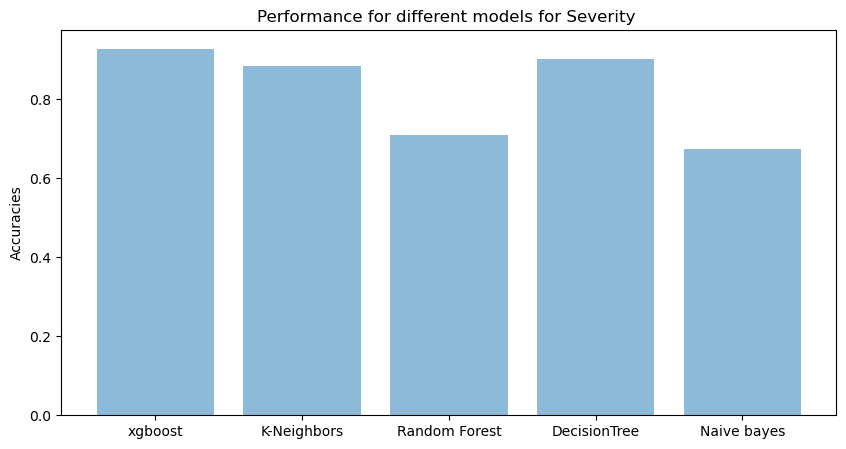

In [47]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
y_pos = np.arange(len(models))

plt.bar(models,Accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracies')
plt.title('Performance for different models for Severity ')
plt.show()

In [54]:
para = ['1','2','3','4','5','6']
Acc = []
for y in range(50,201,50):
    print (y)

50
100
150
200


In [55]:
for y in range(1,7):
    kclf = KNeighborsClassifier(n_neighbors=y)

    kclf = kclf.fit(X_train, y_train)
    y_pred = kclf.predict(X_test)
    y_pred = y_pred.round(0)
    y_pred  = y_pred.astype(int)
    print(y_pred)
    Accuracy = accuracy(y_test, y_pred)
    Acc.append(Accuracy)

[1 1 1 ... 2 1 2]
[1 1 1 ... 2 1 1]
[1 1 1 ... 2 1 1]
[1 1 1 ... 2 1 1]
[1 1 1 ... 2 1 2]
[1 1 1 ... 2 1 2]


In [62]:
Acc = [0.920541581847486, 0.928874989911375, 0.9292793501539586, 0.9295312600631487]
para = ['50','100','150','200']


<Figure size 1000x500 with 0 Axes>

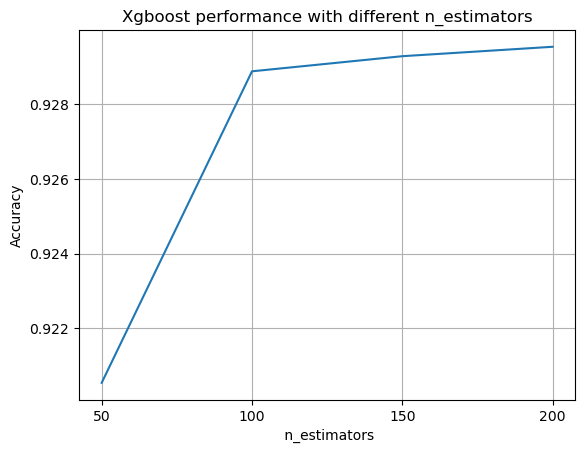

In [65]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
ax.plot(para, Acc)

ax.set(xlabel=' n_estimators', ylabel='Accuracy',
       title='Xgboost performance with different n_estimators')
ax.grid()

plt.show()

In [52]:
Acc

[0.920541581847486, 0.928874989911375, 0.9292793501539586, 0.9295312600631487]